<a href="https://colab.research.google.com/github/subalasingh/8-Week-SQL-Challenge/blob/main/Linear%2C%20Ridge%20and%20Lasso%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Importing house pricing dataset
from sklearn.datasets import fetch_california_housing

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
# Load the California Housing dataset
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
X = pd.DataFrame(data.data, columns=data.feature_names) ##X = data.iloc[:,:-1] ##independent features
y = pd.Series(data.target, name='MedianHouseValue') ##Y = data.iloc[:,-1] ##dependent features

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize Linear Regression model
model = LinearRegression()

In [11]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on the test set
y_test_pred = model.predict(X_test)

In [13]:
# Evaluation on test set
print("R² Score (Test Set):", r2_score(y_test, y_test_pred))
print("Mean Squared Error (Test Set):", mean_squared_error(y_test, y_test_pred))

R² Score (Test Set): 0.5757877060324508
Mean Squared Error (Test Set): 0.5558915986952444


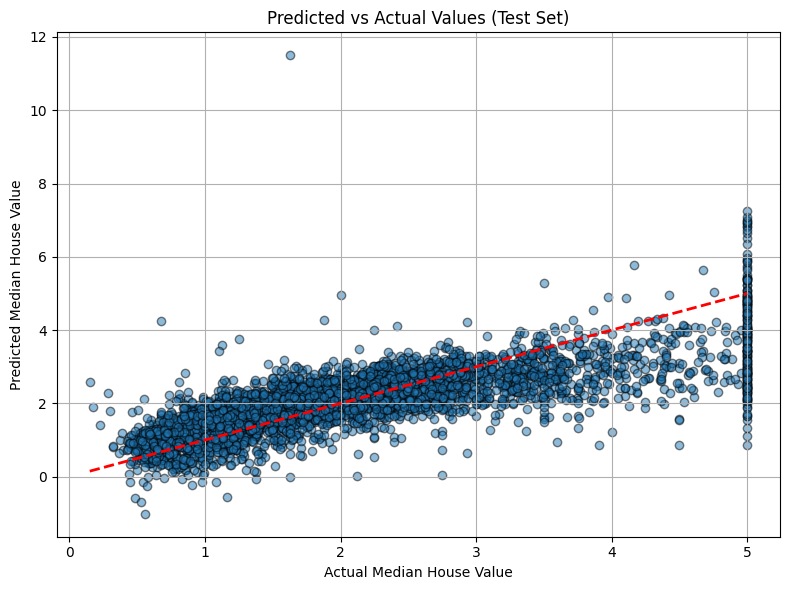

In [14]:
# Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual Values (Test Set)")
plt.grid(True)
plt.tight_layout()

#Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_predict

In [16]:
# Define Ridge model and parameter grid
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

In [17]:
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [24]:
# Best model
best_ridge = grid_search.best_estimator_
print(f"Best alpha: {grid_search.best_params_['alpha']}")

Best alpha: 10.0


In [26]:
# Fit best model to training data
best_ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [27]:
# Predict on test set
y_test_pred = best_ridge.predict(X_test)

In [28]:
# Evaluation
print("R² Score (Test Set):", r2_score(y_test, y_test_pred))
print("Mean Squared Error (Test Set):", mean_squared_error(y_test, y_test_pred))

R² Score (Test Set): 0.5764371559180015
Mean Squared Error (Test Set): 0.5550405537343011


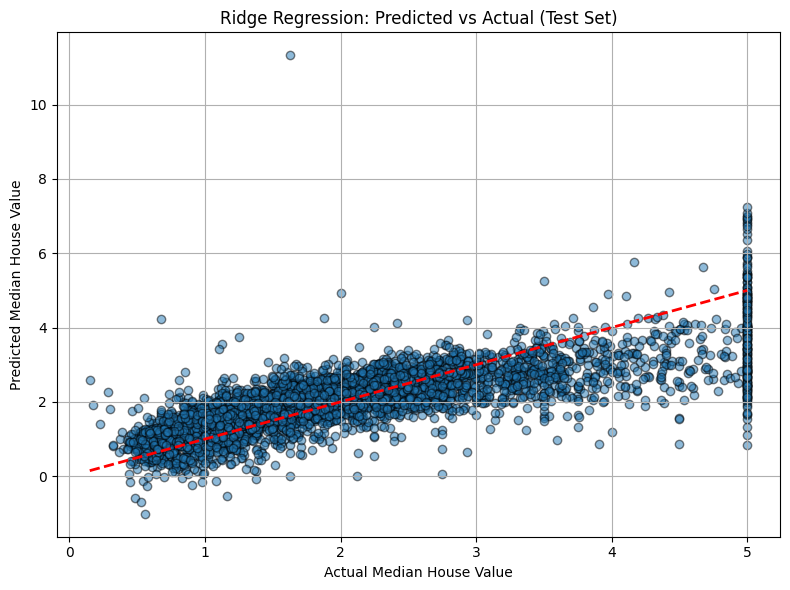

In [29]:
# Plot: Predicted vs Actual on test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Ridge Regression: Predicted vs Actual (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [31]:
# Lasso requires feature scaling, so use a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

In [32]:
# Hyperparameter grid for Lasso
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

In [33]:
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [34]:
# Best model
best_lasso = grid_search.best_estimator_
print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}")

Best alpha: 0.001


In [36]:
# Fit on full training set
best_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001, max_iter=10000))])

In [37]:
# Evaluation
print("R² Score (Test Set):", r2_score(y_test, y_test_pred))
print("Mean Squared Error (Test Set):", mean_squared_error(y_test, y_test_pred))

R² Score (Test Set): 0.5764371559180015
Mean Squared Error (Test Set): 0.5550405537343011


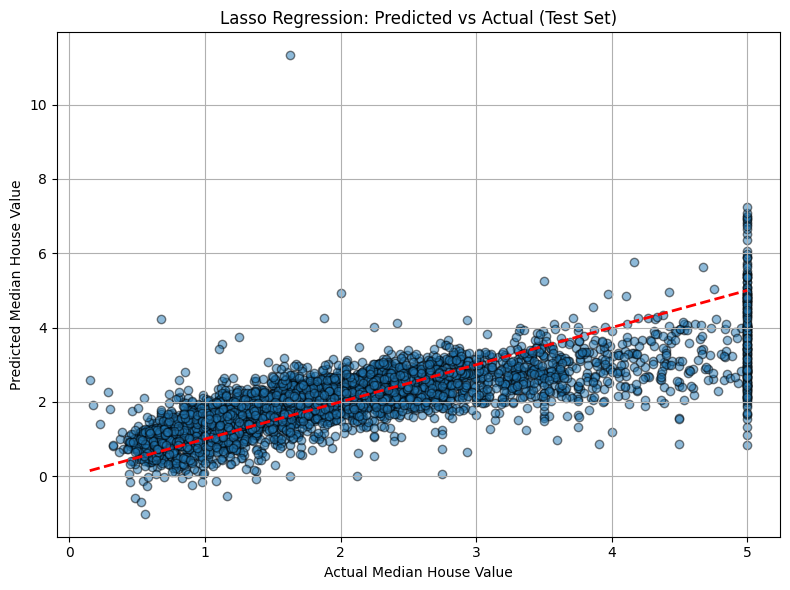

In [38]:
# Plot: Predicted vs Actual on test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Lasso Regression: Predicted vs Actual (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()